<a href="https://colab.research.google.com/github/SinghalManish/Tweet-Sentiment/blob/main/Tweet_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk


In [4]:
pd.set_option('display.max_columns', 200)
# Load the csv file
train = pd.read_csv("/content/sample_data/train_E6oV3lV.csv")
test = pd.read_csv("/content/sample_data/test_tweets_anuFYb8.csv")

# Lets check some data points
train[train['label']==0].head(10)
print("Check label with lable 1")
train[train['label']==1].head(10)

print("test labels")
#test[test['label']==0].head(10)

Check label with lable 1
test labels


In [5]:
print("Data inspection on it way(1) - > Checking the dimensions")

train.shape, test.shape
#test.shape

Data inspection on it way(1) - > Checking the dimensions


((31962, 3), (17197, 2))

In [6]:
# train data set has 3 columns with 31962 tweets
# test has 2 columns with 17197 tweets
# Check Label distrubtion for train data set



In [7]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

# We found the imbalanced dataset

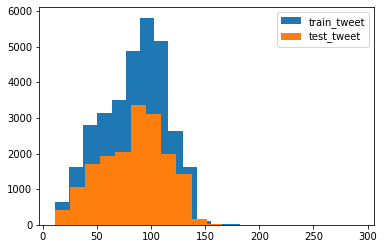

In [8]:
#check the length of tweet in both dataset
length_tweet_train = train['tweet'].str.len()
length_tweet_test = test['tweet'].str.len()
#Plot Histrogram
plt.hist(length_tweet_train,bins=20,label='train_tweet')
plt.hist(length_tweet_test,bins=20,label='test_tweet')
plt.legend()
plt.show()

Cleaning the dataset to eliminate noises

In [9]:
#combine the dataset to clean noise
combine_dataset = train.append(test, ignore_index=True)
combine_dataset.shape

(49159, 3)

In [10]:
# write a function call to remove patterns
def remove_pattern(input_text, pattern):
  r = re.findall(pattern, input_text)
  for i in r:
    input_text=re.sub(i,"",input_text)
  return input_text

In [11]:
#Data cleanising  - > remove @, punctuations, special characters, small words, 
#create a new column for putting up cleaned tweets
combine_dataset['clean_tweet'] = np.vectorize(remove_pattern)(combine_dataset['tweet'],"@[\w]*")
combine_dataset.head(10)
#Removing punctuation, special chactacers
combine_dataset['clean_tweet']=combine_dataset['clean_tweet'].str.replace("[^a-zA-Z#]", "")
combine_dataset.head(10)


,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,whenafatherisdysfunctionalandissoselfishhedrag...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanksfor#lyftcrediticantusecausetheydontoffer...
2,3,0.0,bihday your majesty,bihdayyourmajesty
3,4,0.0,#model i love u take with u all the time in ...,#modeliloveutakewithuallthetimeinur
4,5,0.0,factsguide: society now #motivation,factsguidesocietynow#motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,hugefanfareandbigtalkingbeforetheyleavechaosan...
6,7,0.0,@user camping tomorrow @user @user @user @use...,campingtomorrowdanny
7,8,0.0,the next school year is the year for exams.ð...,thenextschoolyearistheyearforexamscantthinkabo...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,wewonlovetheland#allin#cavs#champions#clevelan...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcomehereimitsso#gr


In [12]:
#Remove short words with length less than 3
combine_dataset['clean_tweet']=combine_dataset['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combine_dataset.head


<bound method NDFrame.head of           id  label                                              tweet  \
0          1    0.0   @user when a father is dysfunctional and is s...   
1          2    0.0  @user @user thanks for #lyft credit i can't us...   
2          3    0.0                                bihday your majesty   
3          4    0.0  #model   i love u take with u all the time in ...   
4          5    0.0             factsguide: society now    #motivation   
...      ...    ...                                                ...   
49154  49155    NaN  thought factory: left-right polarisation! #tru...   
49155  49156    NaN  feeling like a mermaid ð #hairflip #neverre...   
49156  49157    NaN  #hillary #campaigned today in #ohio((omg)) &am...   
49157  49158    NaN  happy, at work conference: right mindset leads...   
49158  49159    NaN  my   song "so glad" free download!  #shoegaze ...   

                                             clean_tweet  
0      whenafatherisdy

In [13]:
#text stemmering : Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. For example: words such as “Likes”, ”liked”, ”likely” and ”liking” will be reduced to “like” after stemming.
token_tweet = combine_dataset['clean_tweet'].apply(lambda x: x.split())
token_tweet.head()

0    [whenafatherisdysfunctionalandissoselfishhedra...
1    [thanksfor#lyftcrediticantusecausetheydontoffe...
2                                  [bihdayyourmajesty]
3                [#modeliloveutakewithuallthetimeinur]
4                    [factsguidesocietynow#motivation]
Name: clean_tweet, dtype: object

In [14]:
# Apply Stemmer
from nltk.stem.porter import *
stemmer = PorterStemmer()
token_tweet = token_tweet.apply(lambda x:[stemmer.stem(i) for i in x])

# New Section

In [15]:
#Stich all the token back using Moses Detokenizer function
for i in range(len(token_tweet)):
  token_tweet[i] = ' '.join(token_tweet[i])
  combine_dataset['clean_tweet'] = token_tweet

Data Visualization

---



---



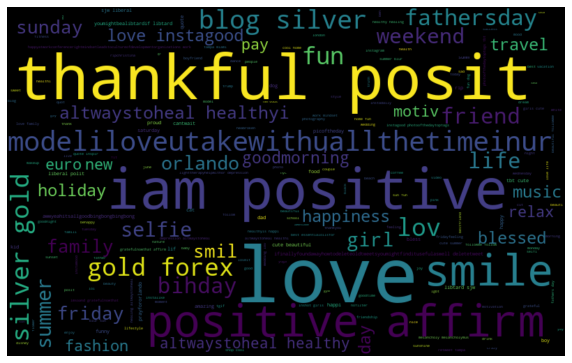

In [16]:
#Data Visualization to answer few questions
#Before we begin exploration, we must think and ask questions related to the data in hand. A few probable questions are as follows:

#What are the most common words in the entire dataset?
#What are the most common words in the dataset for negative and positive tweets, respectively?
#How many hashtags are there in a tweet?
#Which trends are associated with my dataset?
#Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

#worldcloud is a visualization to show common word in large font size and less common words in reduced font size

all_words = ' '.join([text for text in combine_dataset['clean_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

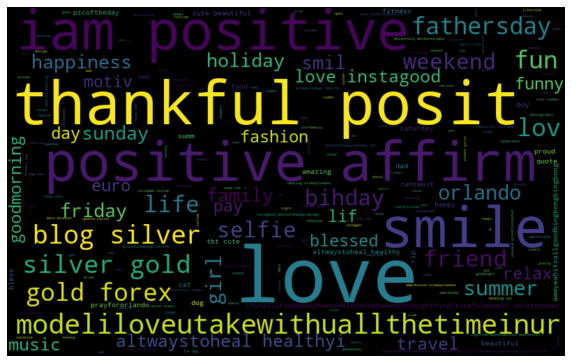

In [17]:
#Words in non racist/sexist tweets
normal_words = ' '.join([text for text in combine_dataset['clean_tweet'][combine_dataset['label'] == 0]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


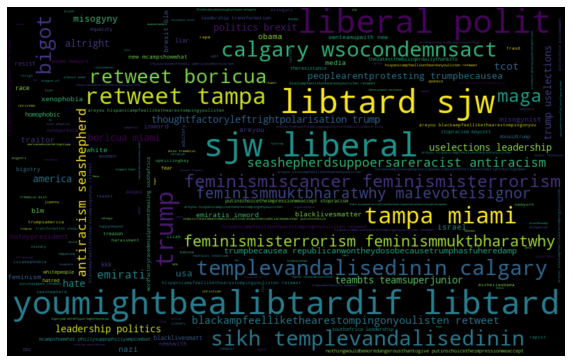

In [18]:
#Words in  racist/sexist tweets
negative_words = ' '.join([text for text in combine_dataset['clean_tweet'][combine_dataset['label'] == 1]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
#understanding the impact of hash tags on racisim
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [21]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combine_dataset['clean_tweet'][combine_dataset['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combine_dataset['clean_tweet'][combine_dataset['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

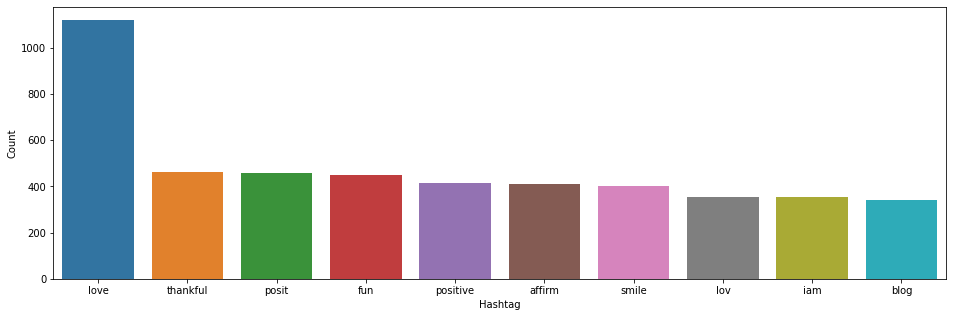

In [24]:
#Lets prepare hashtags of top 10 which are non racist
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

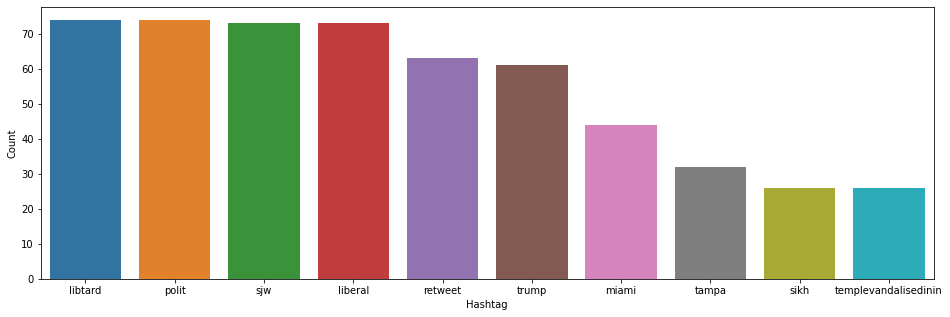

In [25]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

Extracting features from clean tweet

In [27]:
#Bag-of-Words Features
#Bag-of-Words is a method to represent text into numerical features. 
#Consider a corpus (a collection of texts) called C of D documents {d1,d2…..dD} and N unique tokens 
#extracted out of the corpus C. 
#The N tokens (words) will form a list, and the size of the bag-of-words matrix M will be given by D X N. 
#Each row in the matrix M contains the frequency of tokens in document D(i).

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combine_dataset['clean_tweet'])


<49159x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 52795 stored elements in Compressed Sparse Row format>

In [28]:
#TF-IDF Features
#This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account, 
#not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combine_dataset['clean_tweet'])

In [29]:
#build the model using logistic regression on Bag of Words

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.37514384349827384

In [30]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [31]:
#build the model using logistic regression on TF-IDF
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.3858447488584475